Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,', '3364',
       'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


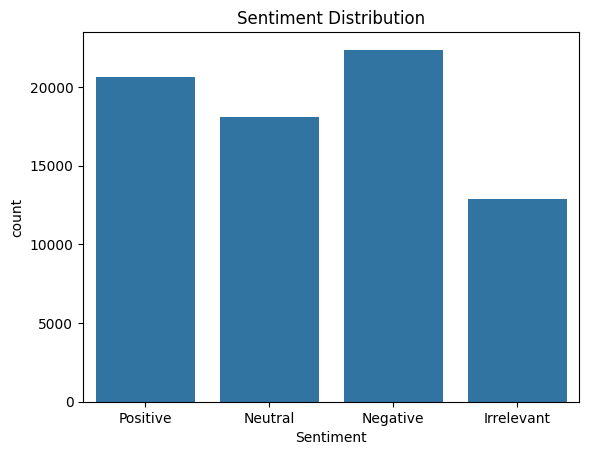

<Figure size 1200x600 with 0 Axes>

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


train_df = pd.read_csv('twitter_training.csv')
validation_df = pd.read_csv('twitter_validation.csv')

df = pd.concat([train_df, validation_df], ignore_index=True)

print(df.columns)

df = df.iloc[:, [3, 2]]
df.columns = ['TweetText', 'Sentiment']

df['TweetText'] = df['TweetText'].str.lower()
df.dropna(subset=['TweetText'], inplace=True)

sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

positive_texts = ' '.join(df[df['Sentiment'] == 'Positive']['TweetText'].fillna(''))
negative_texts = ' '.join(df[df['Sentiment'] == 'Negative']['TweetText'].fillna(''))

plt.figure(figsize=(12, 6))



plt.show()

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['TweetText'])
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)



Text(0.5, 1.0, 'Positive Sentiment WordCloud')

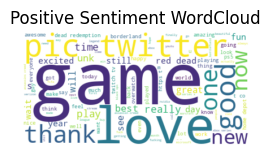

In [16]:
plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color='white', max_words=100, contour_color='steelblue').generate(positive_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment WordCloud')



Text(0.5, 1.0, 'Negative Sentiment WordCloud')

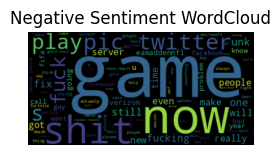

In [17]:
plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color='black', max_words=100, contour_color='steelblue').generate(negative_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment WordCloud')


              precision    recall  f1-score   support

  Irrelevant       0.83      0.63      0.71      3900
    Negative       0.70      0.85      0.77      6709
     Neutral       0.82      0.65      0.73      5418
    Positive       0.72      0.80      0.76      6172

    accuracy                           0.75     22199
   macro avg       0.77      0.73      0.74     22199
weighted avg       0.76      0.75      0.75     22199



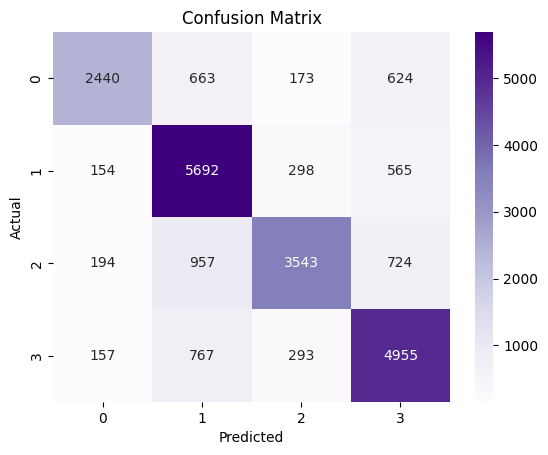

In [14]:
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
